In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2000-01-01'
end = '2024-10-10'

stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)


In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.493011,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.691030,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.718112,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.605561,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.633636,184645512
...,...,...,...,...,...,...,...
5065,2024-10-03,165.820007,167.910004,165.369995,167.210007,167.210007,11004300
5066,2024-10-04,169.339996,169.550003,166.960007,168.559998,168.559998,11422100
5067,2024-10-07,169.139999,169.899994,164.130005,164.389999,164.389999,14034700
5068,2024-10-08,165.429993,166.100006,164.309998,165.699997,165.699997,11723900


In [7]:
ma_100_days = data.Close.rolling(100).mean()


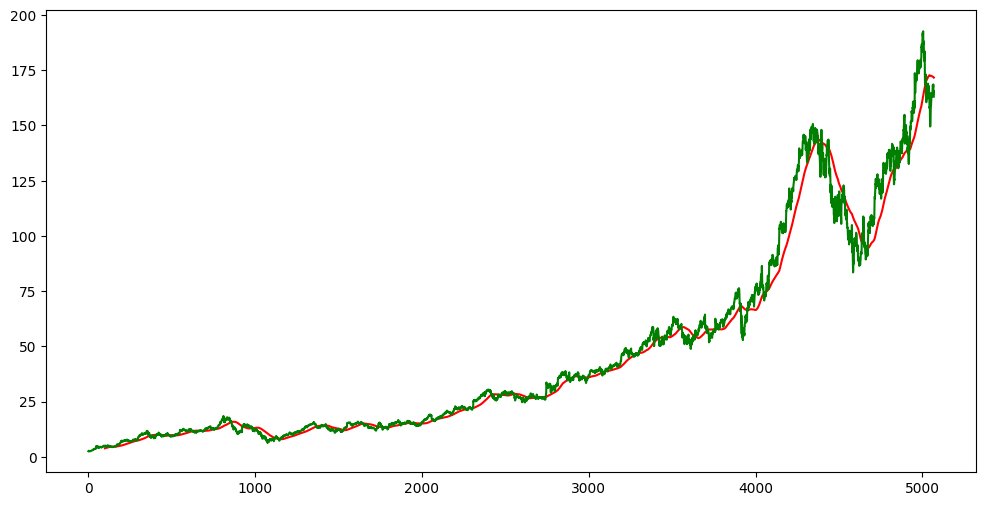

In [8]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

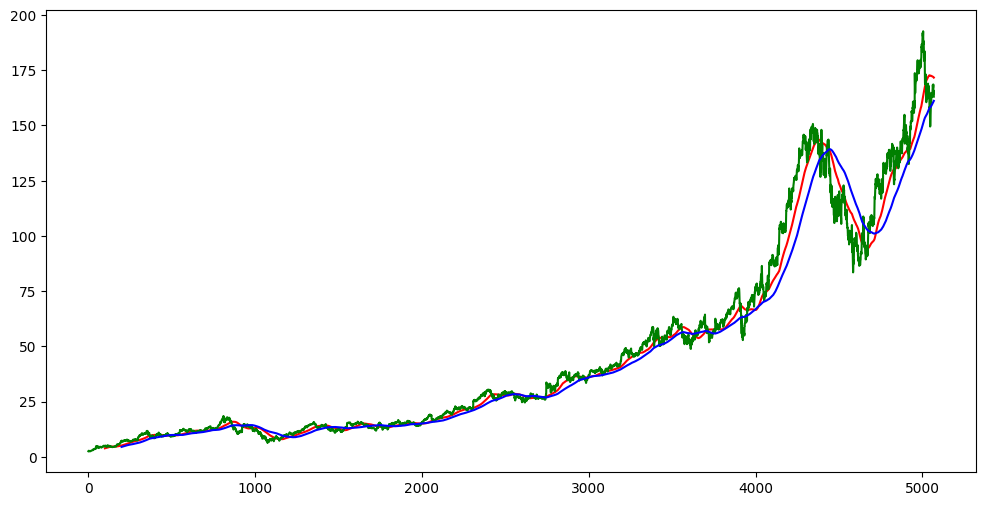

In [10]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.plot(ma_200_days,'b')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):int(len(data))])

In [13]:
data_train.shape[0]

4056

In [14]:
data_test.shape[0]

1014

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
x, y = np.array(x),np.array(y)

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 26s 150ms/step - loss: 0.0348
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step - loss: 0.0041
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - loss: 0.0036
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - loss: 0.0031
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - loss: 0.0029
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - loss: 0.0029
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - loss: 0.0028
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - loss: 0.0028
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - loss: 0.0031
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - loss: 0.0024
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - loss: 0.0021
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - loss: 0.0020
Epoch 13/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - loss: 0.0023
Epoch 14/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step - loss: 0.0021
Epoch 15/50
124

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days,data_test], ignore_index=True)

In [27]:
data_test_scale = scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [29]:
x, y = np.array(x), np.array(y) 

In [30]:
y_predict = model.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


In [31]:
 scale = 1/scaler.scale_

In [32]:
y_predict = y_predict*scale

In [33]:
y = y*scale

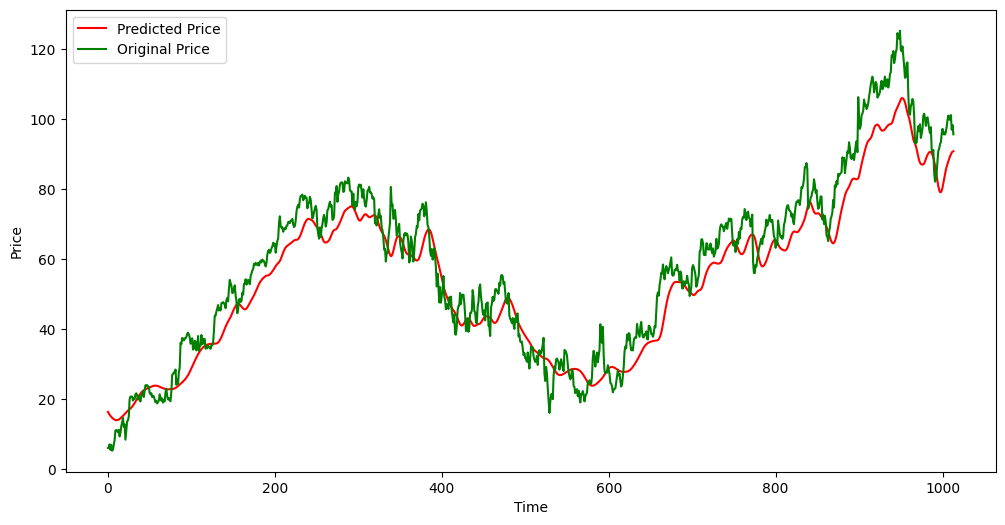

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_predict,'r', label = 'Predicted Price')
plt.plot(y,'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
model.save('Stock Prediction Model.keras')